In [19]:
import pandas as pd 
import seaborn as sn
import numpy as np
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv("C:\\Users\\Nakesh\\Desktop\\Machine Larning-P1\\Classification model\\combined & cleaned.csv")

In [2]:
# Loading weather data 
weather  = data
print(weather.keys())
# ['Unnamed: 0', 'Date', 'Max.', 'Min.', 'Morn', 'Eve', 'Rain','Rainy Days ', 'PE', 'Year']

Index(['Unnamed: 0', 'Date', 'Max.', 'Min.', 'Morn', 'Eve', 'Rain',
       'Rainy Days ', 'PE', 'Year'],
      dtype='object')


In [3]:
df = pd.DataFrame(weather)
df = df.drop(columns=['Unnamed: 0' , 'Year'])

df['Rainy Days '].unique() # contains values that are wrong
# Replace incorrect categories
df['Rainy Days '] = df['Rainy Days '].replace({20.0: 0, 11.0: 1})
df['Rainy Days '].unique()
df

,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE
0,01.01.20,21.0,13.5,NaN,NaN,0.0,0.0,0.43
1,2.01.20,22.5,13.5,NaN,NaN,2.0,1.0,0.43
2,3.01.20,21.5,15.5,NaN,NaN,0.0,0.0,0.43
3,4.01.20,19.0,11.5,NaN,NaN,0.0,0.0,0.87
4,5.01.20,23.0,8.0,NaN,NaN,0.0,0.0,1.74
...,...,...,...,...,...,...,...,...
4003,17.05.20,42.0,24.0,NaN,NaN,0.0,0.0,8.25
4004,18.05.20,42.5,23.5,NaN,NaN,0.0,0.0,7.81
4005,19.05.20,41.0,21.5,NaN,NaN,0.0,0.0,9.55
4006,20.05.20,43.0,21.0,NaN,NaN,0.0,0.0,9.98


In [4]:
df['Date'] = pd.to_datetime(df['Date'] , format= "%d.%m.%y")

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


df = df.drop('Date' , axis=1)
df.isna().sum()

Max.             72
Min.              0
Morn            912
Eve             911
Rain              0
Rainy Days        0
PE             1257
year              0
month             0
day               0
dtype: int64

In [5]:
df

,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,year,month,day
0,21.0,13.5,NaN,NaN,0.0,0.0,0.43,2020,1,1
1,22.5,13.5,NaN,NaN,2.0,1.0,0.43,2020,1,2
2,21.5,15.5,NaN,NaN,0.0,0.0,0.43,2020,1,3
3,19.0,11.5,NaN,NaN,0.0,0.0,0.87,2020,1,4
4,23.0,8.0,NaN,NaN,0.0,0.0,1.74,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
4003,42.0,24.0,NaN,NaN,0.0,0.0,8.25,2020,5,17
4004,42.5,23.5,NaN,NaN,0.0,0.0,7.81,2020,5,18
4005,41.0,21.5,NaN,NaN,0.0,0.0,9.55,2020,5,19
4006,43.0,21.0,NaN,NaN,0.0,0.0,9.98,2020,5,20


In [6]:
# filling Median values in the place of NaN values for column 

m_min = df['Max.'].median()
m_morn = df['Morn'].median()
m_Eve = df['Eve'].median()
m_PE = df['PE'].median()

df['Max.'] = df['Max.'].fillna(m_min)
df['Morn'] = df['Morn'].fillna(m_morn)
df['Eve'] = df['Eve'].fillna(m_Eve)
df['PE'] = df['PE'].fillna(m_PE)

df.isna().sum()

df.to_csv('ready_to_use_data.csv', index=False)
df

,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,year,month,day
0,21.0,13.5,78.0,48.0,0.0,0.0,0.43,2020,1,1
1,22.5,13.5,78.0,48.0,2.0,1.0,0.43,2020,1,2
2,21.5,15.5,78.0,48.0,0.0,0.0,0.43,2020,1,3
3,19.0,11.5,78.0,48.0,0.0,0.0,0.87,2020,1,4
4,23.0,8.0,78.0,48.0,0.0,0.0,1.74,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
4003,42.0,24.0,78.0,48.0,0.0,0.0,8.25,2020,5,17
4004,42.5,23.5,78.0,48.0,0.0,0.0,7.81,2020,5,18
4005,41.0,21.5,78.0,48.0,0.0,0.0,9.55,2020,5,19
4006,43.0,21.0,78.0,48.0,0.0,0.0,9.98,2020,5,20


In [7]:
print(df.columns)

Index(['Max.', 'Min.', 'Morn', 'Eve', 'Rain', 'Rainy Days ', 'PE', 'year',
       'month', 'day'],
      dtype='object')


In [8]:
x = df.drop('Rainy Days ' , axis=1)
y = df['Rainy Days ']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:
y_predicted = dtc.predict(x_test)
dtc.score(x_test , y_test)


0.9975062344139651

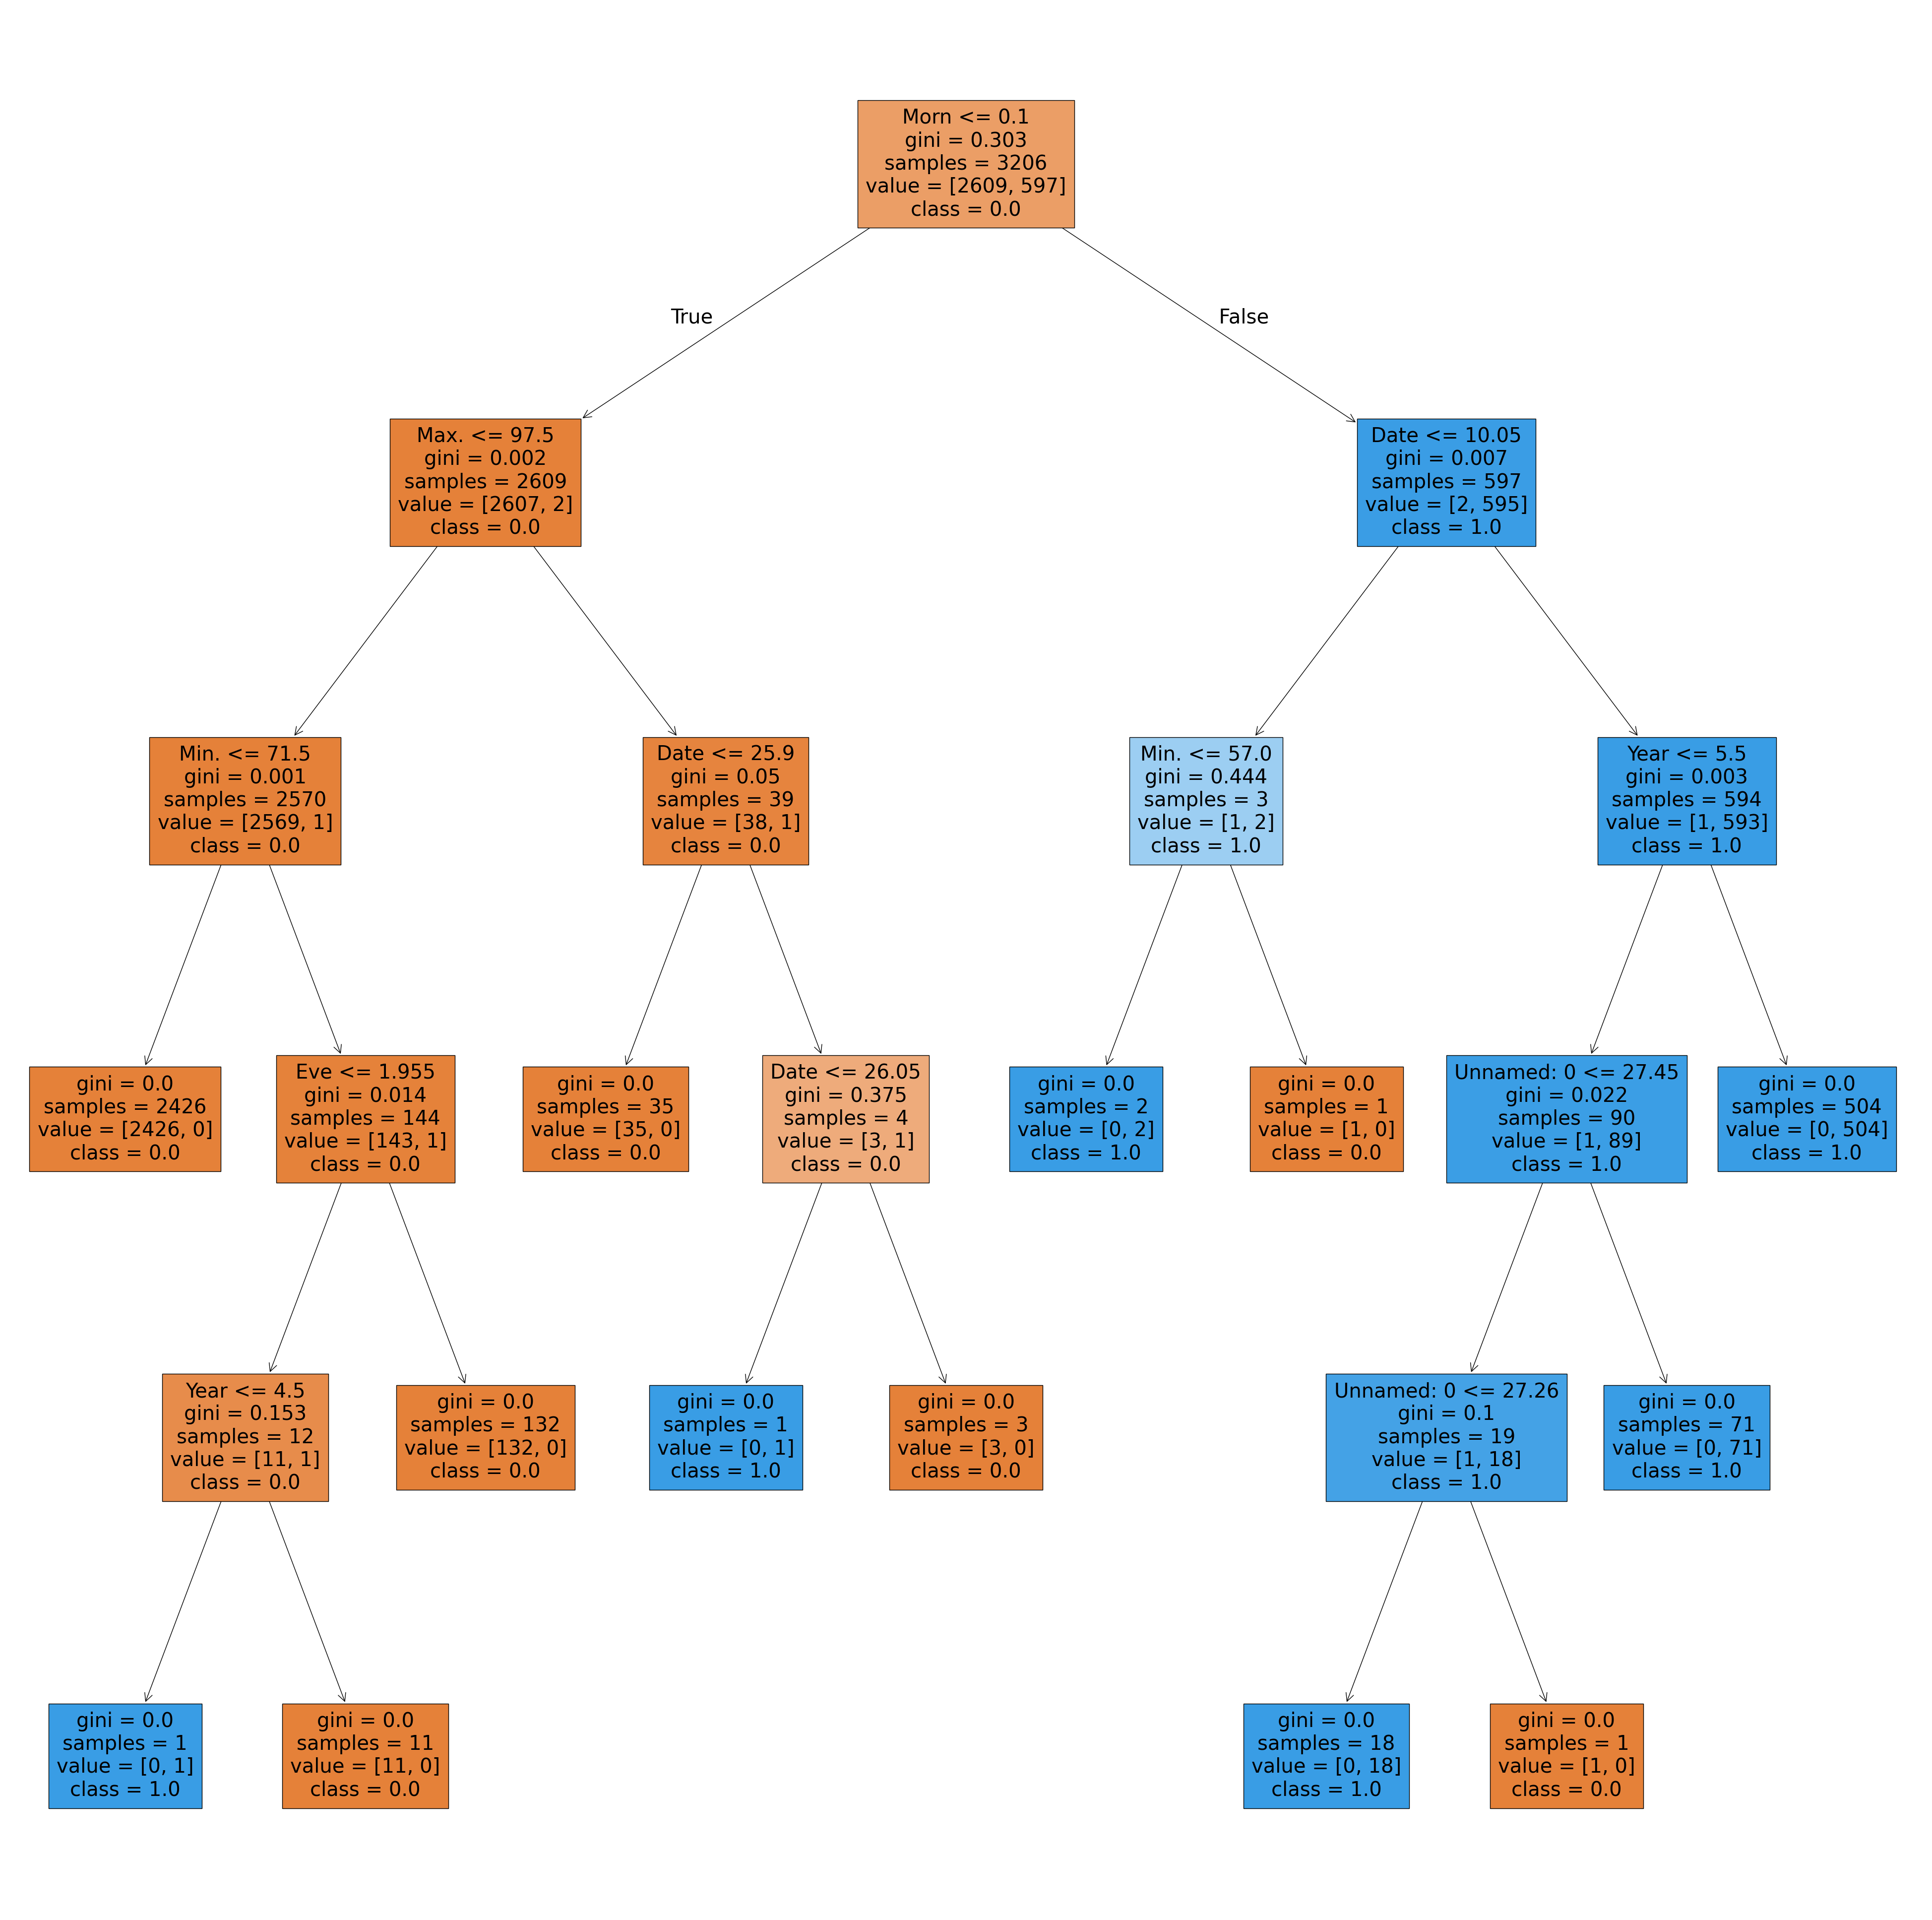

In [12]:

plt.figure(figsize=(50, 50))
plot_tree(
    dtc, 
    filled=True,
    feature_names=weather.drop('Rainy Days ', axis=1).columns,
    class_names=weather['Rainy Days '].unique().astype(str)
)
plt.show()

In [13]:
cmetrix = confusion_matrix(y_test , y_predicted) 
cmetrix

array([[650,   0],
       [  2, 150]])

In [14]:
len(y_predicted)

802

Text(58.222222222222214, 0.5, 'Actual')

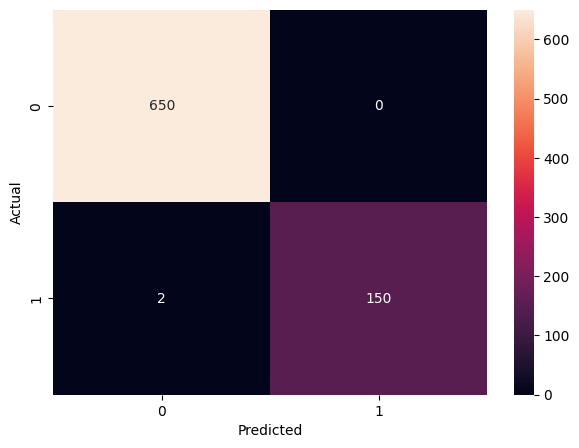

In [15]:
# visualizing it with seborn library 
plt.figure(figsize=(7,5))
sn.heatmap(cmetrix , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
print(f"Model predictiion was {accuracy_score(y_test, y_predicted, normalize=True, sample_weight=None)*100}% Accurate")


Model predictiion was 99.75062344139651% Accurate
